In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('C:/Mall_Customers.csv')

In [10]:
df.head(200)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [14]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Text(0.5, 1.0, 'Distribución de Edad')

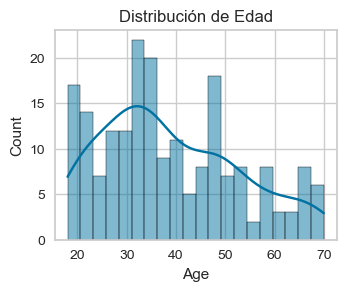

In [20]:
plt.figure(figsize=(8, 6))
plt.subplot(2, 2, 1)
sns.histplot(df['Age'], kde=True, bins=20)
plt.title('Distribución de Edad')

Text(0.5, 1.0, 'Distribución de Ingreso Anual')

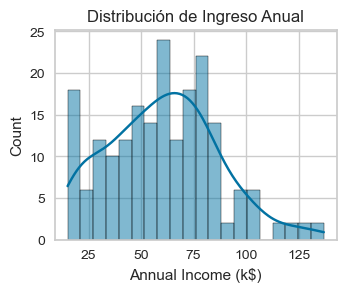

In [22]:
plt.figure(figsize=(8, 6))
plt.subplot(2, 2, 2)
sns.histplot(df['Annual Income (k$)'], kde=True, bins=20)
plt.title('Distribución de Ingreso Anual')

Text(0.5, 1.0, 'Distribución de Puntaje de Gasto')

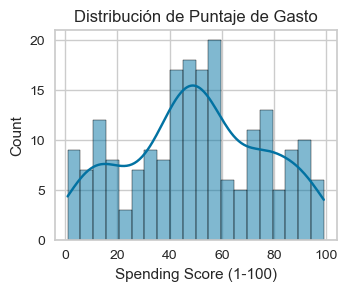

In [24]:
plt.figure(figsize=(8, 6))
plt.subplot(2, 2, 3)
sns.histplot(df['Spending Score (1-100)'], kde=True, bins=20)
plt.title('Distribución de Puntaje de Gasto')

Text(0.5, 1.0, 'Distribución de Género')

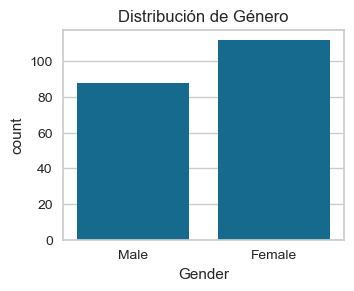

In [26]:
plt.figure(figsize=(8, 6))
plt.subplot(2, 2, 4)
sns.countplot(x='Gender', data=df)
plt.title('Distribución de Género')

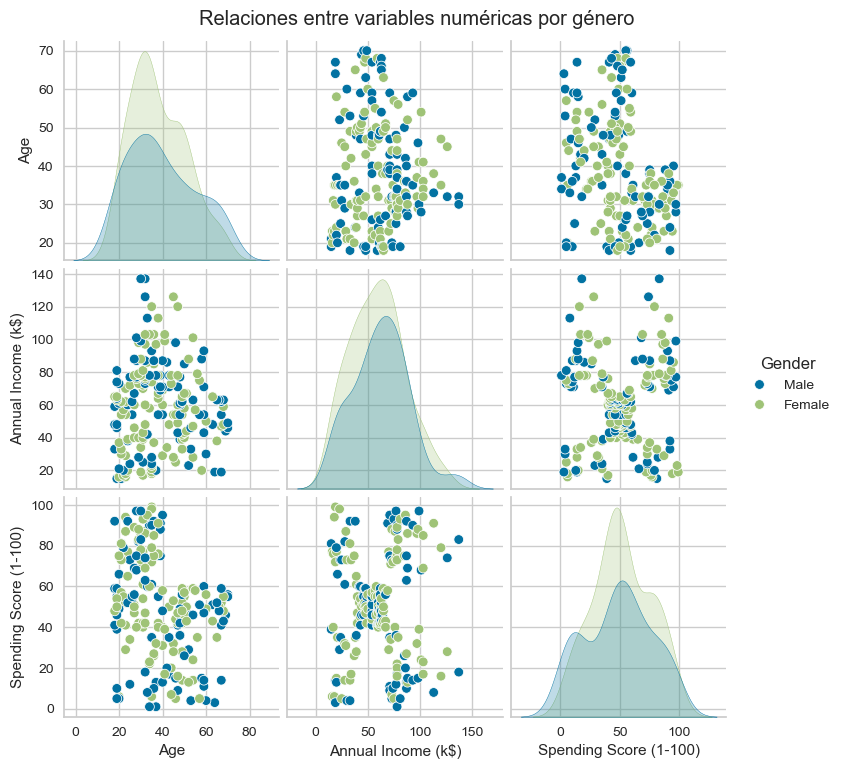

In [28]:
sns.pairplot(df, hue='Gender', vars=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'])
plt.suptitle('Relaciones entre variables numéricas por género', y=1.02)
plt.show()

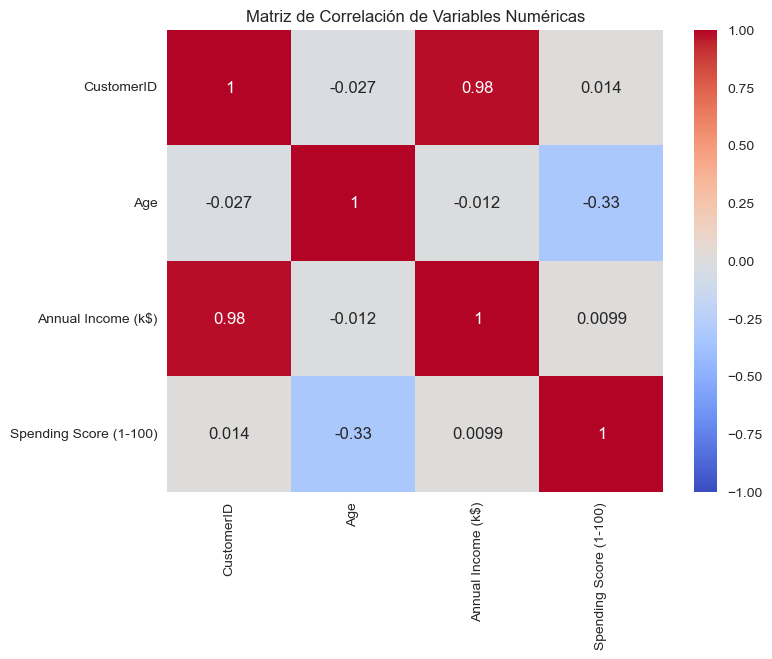

In [30]:
plt.figure(figsize=(8, 6))
correlation_matrix = df.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlación de Variables Numéricas')
plt.show()

In [32]:
df_processed = df.copy()

In [34]:
df_processed['Gender'] = df_processed['Gender'].map({'Male': 0, 'Female': 1})


Text(0.5, 1.0, 'Boxplot de Edad')

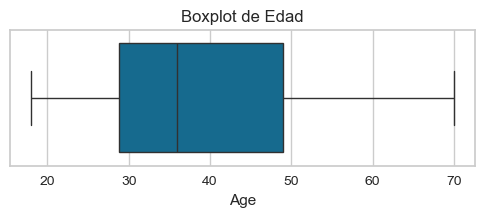

In [38]:
plt.figure(figsize=(6, 6))
plt.subplot(3, 1, 1)
sns.boxplot(x='Age', data=df_processed)
plt.title('Boxplot de Edad')

Text(0.5, 1.0, 'Boxplot de Ingreso Anual')

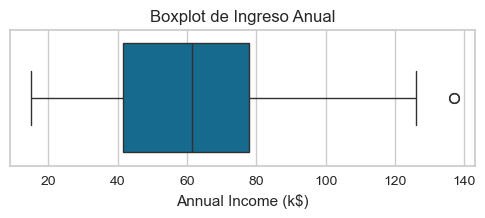

In [40]:
plt.figure(figsize=(6, 6))
plt.subplot(3, 1, 2)
sns.boxplot(x='Annual Income (k$)', data=df_processed)
plt.title('Boxplot de Ingreso Anual')

Text(0.5, 1.0, 'Boxplot de Puntaje de Gasto')

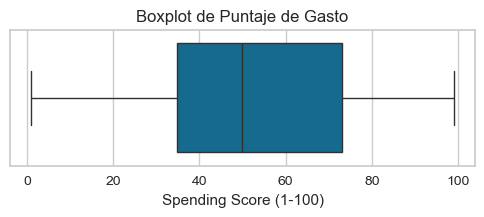

In [42]:
plt.figure(figsize=(6, 6))
plt.subplot(3, 1, 3)
sns.boxplot(x='Spending Score (1-100)', data=df_processed)
plt.title('Boxplot de Puntaje de Gasto')

In [44]:
def treat_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column].count()
    print(f"Valores atípicos en {column}: {outliers}")
    
    df.loc[df[column] < lower_bound, column] = lower_bound
    df.loc[df[column] > upper_bound, column] = upper_bound
    
    return df

In [58]:
for column in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    df_processed = treat_outliers(df_processed, column)

features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender']
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_processed[features]), columns=features)


Valores atípicos en Age: 0
Valores atípicos en Annual Income (k$): 0
Valores atípicos en Spending Score (1-100): 0


In [60]:
df_scaled.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender
0,-1.424569,-1.745429,-0.434801,-1.128152
1,-1.281035,-1.745429,1.195704,-1.128152
2,-1.352802,-1.707083,-1.715913,0.886405
3,-1.137502,-1.707083,1.040418,0.886405
4,-0.563369,-1.668737,-0.395980,0.886405


In [62]:
pca = PCA()
pca_result = pca.fit_transform(df_scaled)

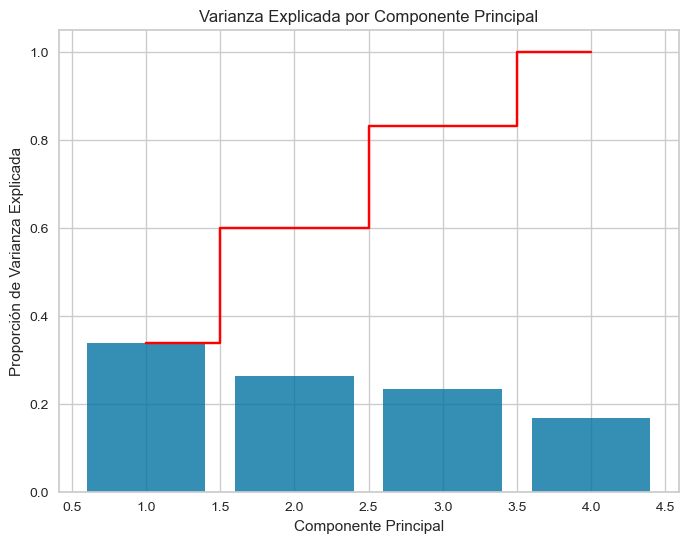

In [64]:
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, alpha=0.8)
plt.step(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_), where='mid', color='red')
plt.ylabel('Proporción de Varianza Explicada')
plt.xlabel('Componente Principal')
plt.title('Varianza Explicada por Componente Principal')
plt.show()

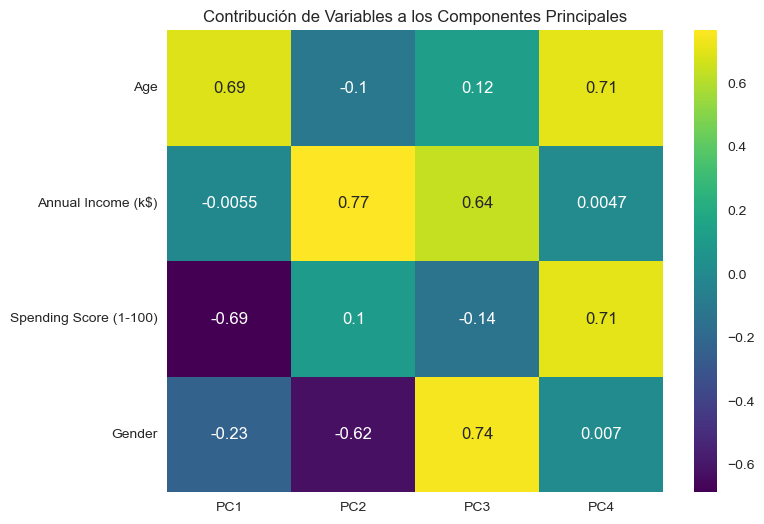

In [66]:
plt.figure(figsize=(8, 6))
sns.heatmap(pca.components_.T, annot=True, cmap='viridis', 
            yticklabels=features, xticklabels=[f'PC{i+1}' for i in range(pca.components_.shape[0])])
plt.title('Contribución de Variables a los Componentes Principales')
plt.show()

In [68]:
selected_features = ['Annual Income (k$)', 'Spending Score (1-100)']
X_selected = df_scaled[selected_features]

In [70]:
X_all = df_scaled.copy()

Text(0.5, 1.0, 'Método del Codo (Características Seleccionadas)')

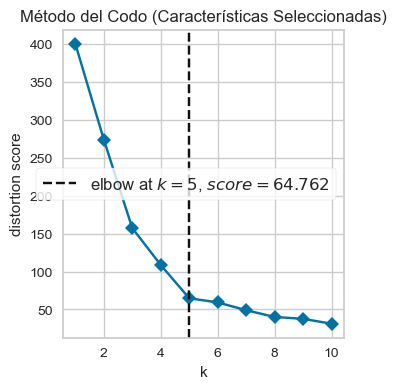

In [72]:
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
elbow_viz_selected = KElbowVisualizer(KMeans(random_state=42), k=(1, 11), metric='distortion', timings=False)
elbow_viz_selected.fit(X_selected)
elbow_viz_selected.finalize()
plt.title('Método del Codo (Características Seleccionadas)')

Text(0.5, 1.0, 'Método del Codo (Todas las Características)')

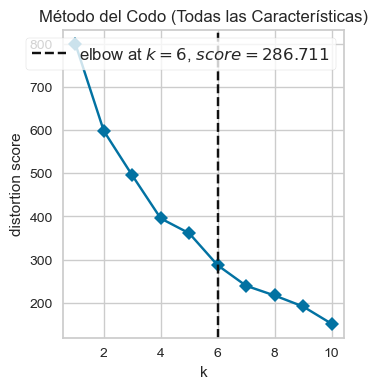

In [74]:
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 2)
elbow_viz_all = KElbowVisualizer(KMeans(random_state=42), k=(1, 11), metric='distortion', timings=False)
elbow_viz_all.fit(X_all)
elbow_viz_all.finalize()
plt.title('Método del Codo (Todas las Características)')


In [76]:
n_clusters_range = range(2, 11)
silhouette_scores_selected = []
silhouette_scores_all = []
calinski_scores_selected = []
calinski_scores_all = []

for n_clusters in n_clusters_range:
    kmeans_selected = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    cluster_labels_selected = kmeans_selected.fit_predict(X_selected)
    silhouette_scores_selected.append(silhouette_score(X_selected, cluster_labels_selected))
    calinski_scores_selected.append(calinski_harabasz_score(X_selected, cluster_labels_selected))
    
    
    kmeans_all = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    cluster_labels_all = kmeans_all.fit_predict(X_all)
    
    silhouette_scores_all.append(silhouette_score(X_all, cluster_labels_all))
    calinski_scores_all.append(calinski_harabasz_score(X_all, cluster_labels_all))


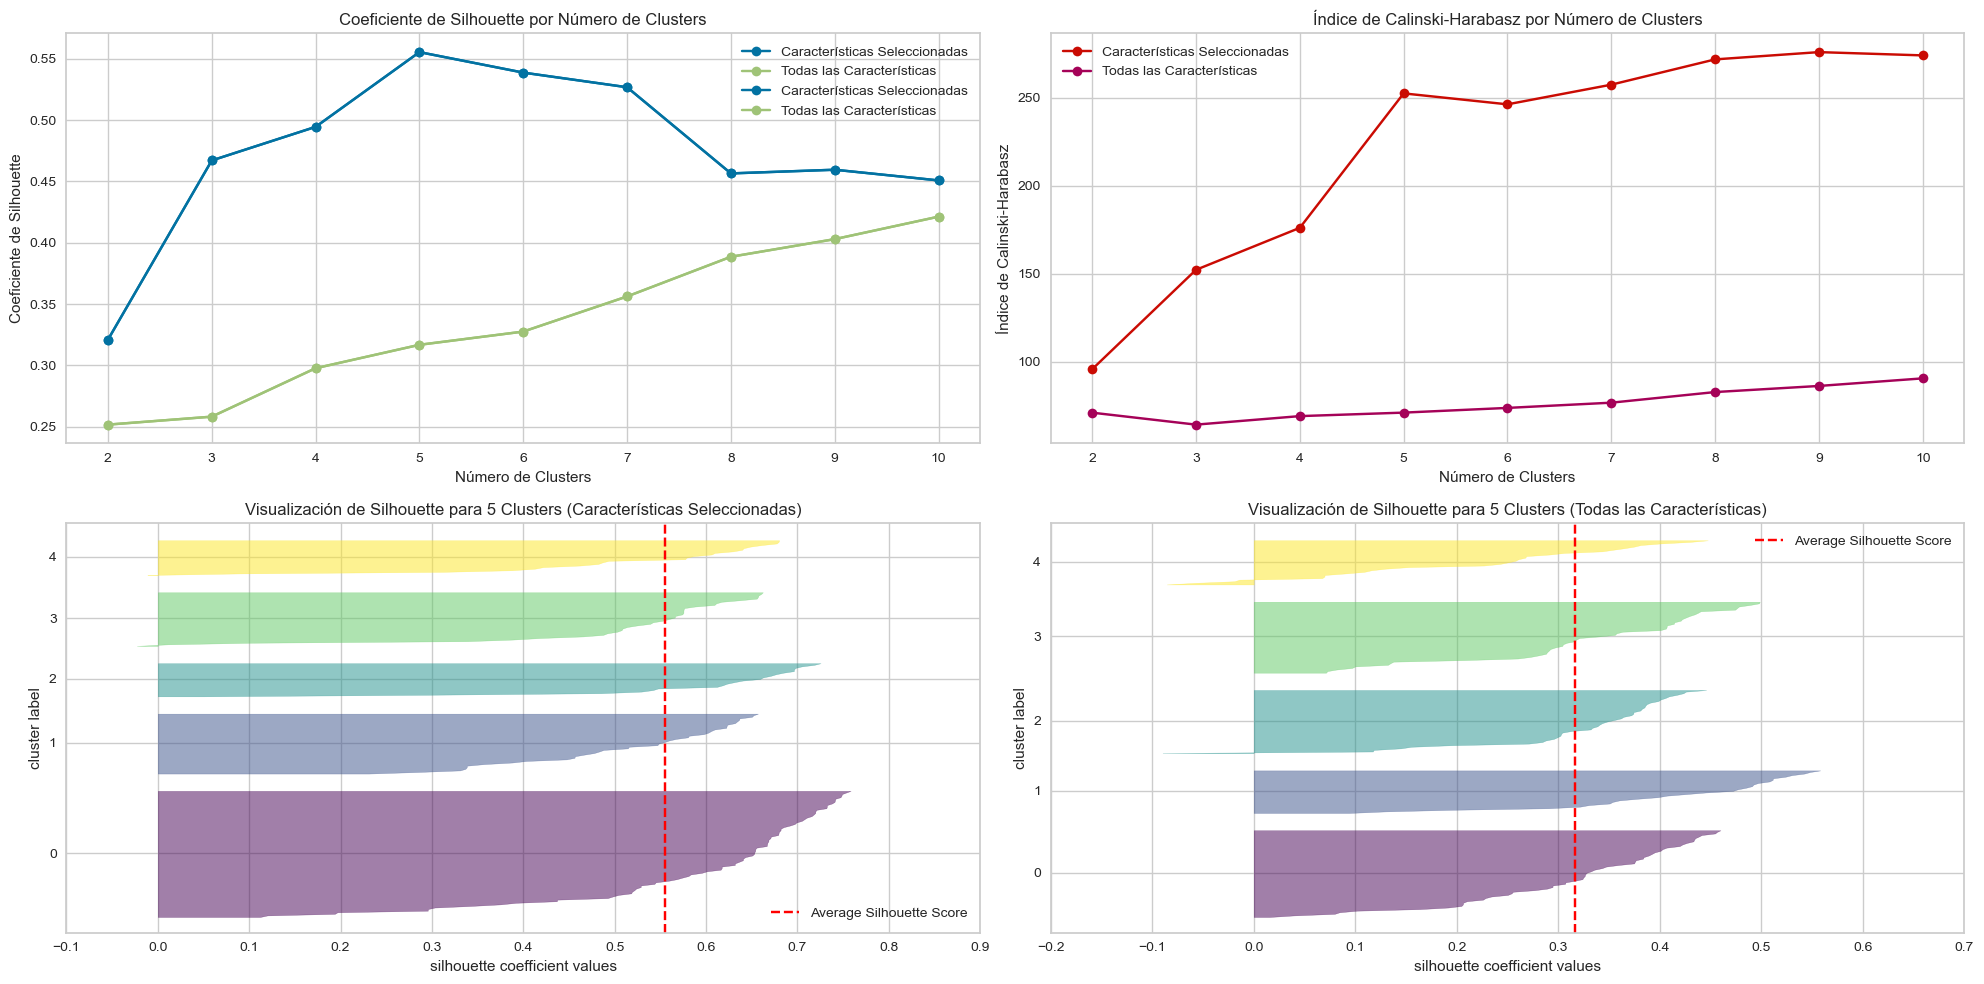

In [84]:
plt.figure(figsize=(20, 10))
plt.subplot(2, 2, 1)
plt.plot(n_clusters_range, silhouette_scores_selected, 'bo-', label='Características Seleccionadas')
plt.plot(n_clusters_range, silhouette_scores_all, 'go-', label='Todas las Características')
plt.xlabel('Número de Clusters')
plt.ylabel('Coeficiente de Silhouette')
plt.title('Coeficiente de Silhouette por Número de Clusters')
plt.legend()
plt.grid(True)
plt.subplot(2, 2, 1)
plt.plot(n_clusters_range, silhouette_scores_selected, 'bo-', label='Características Seleccionadas')
plt.plot(n_clusters_range, silhouette_scores_all, 'go-', label='Todas las Características')
plt.xlabel('Número de Clusters')
plt.ylabel('Coeficiente de Silhouette')
plt.title('Coeficiente de Silhouette por Número de Clusters')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(n_clusters_range, calinski_scores_selected, 'ro-', label='Características Seleccionadas')
plt.plot(n_clusters_range, calinski_scores_all, 'mo-', label='Todas las Características')
plt.xlabel('Número de Clusters')
plt.ylabel('Índice de Calinski-Harabasz')
plt.title('Índice de Calinski-Harabasz por Número de Clusters')
plt.legend()
plt.grid(True)

optimal_clusters = 5

plt.subplot(2, 2, 3)
visualizer = SilhouetteVisualizer(KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10), colors='viridis')
visualizer.fit(X_selected)
visualizer.finalize()
plt.title(f'Visualización de Silhouette para {optimal_clusters} Clusters (Características Seleccionadas)')

plt.subplot(2, 2, 4)
visualizer = SilhouetteVisualizer(KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10), colors='viridis')
visualizer.fit(X_all)
visualizer.finalize()
plt.title(f'Visualización de Silhouette para {optimal_clusters} Clusters (Todas las Características)')

plt.tight_layout()
plt.show()


In [88]:
optimal_clusters = 5
best_features = 'selected' 

if best_features == 'selected':
    X_final = X_selected
    features_used = selected_features
else:
    X_final = X_all
    features_used = features


kmeans_final = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10)
df_processed['Cluster'] = kmeans_final.fit_predict(X_final)

In [90]:
print(f"Número óptimo de clusters: {optimal_clusters}")
print(f"Características utilizadas: {', '.join(features_used)}")
print(f"Coeficiente de Silhouette: {silhouette_score(X_final, df_processed['Cluster']):.4f}")
print(f"Índice de Calinski-Harabasz: {calinski_harabasz_score(X_final, df_processed['Cluster']):.4f}")


Número óptimo de clusters: 5
Características utilizadas: Annual Income (k$), Spending Score (1-100)
Coeficiente de Silhouette: 0.5555
Índice de Calinski-Harabasz: 252.3506


In [92]:
if best_features == 'selected':
    centroids = pd.DataFrame(scaler.inverse_transform(
        np.hstack([np.zeros((optimal_clusters, 2)), kmeans_final.cluster_centers_])
    )[:, 2:], columns=selected_features)
else:
    centroids = pd.DataFrame(scaler.inverse_transform(kmeans_final.cluster_centers_), columns=features)

print("\nCentroides de los clusters:")
display(centroids)


Centroides de los clusters:


,Annual Income (k$),Spending Score (1-100)
0,45.042710,0.546868
1,75.794793,1.175273
2,15.835648,1.121998
3,77.423690,-0.077579
4,16.405659,-0.004375


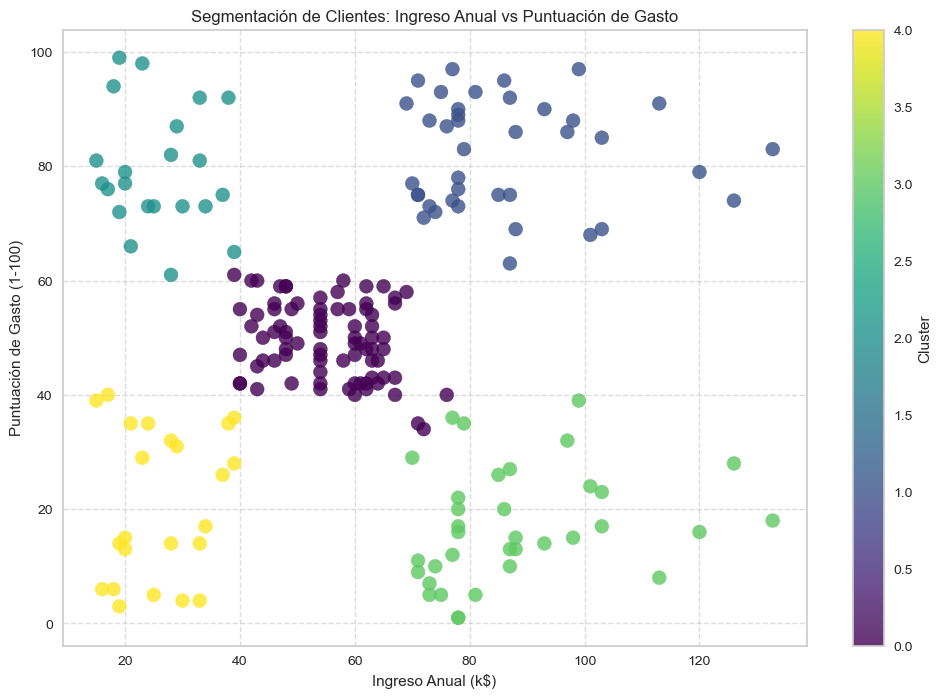

In [98]:
plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    df_processed['Annual Income (k$)'], 
    df_processed['Spending Score (1-100)'],
    c=df_processed['Cluster'],
    cmap='viridis',
    s=100,
    alpha=0.8
)
plt.colorbar(scatter, label='Cluster')

for i, centroid in enumerate(kmeans_final.cluster_centers_):
    if best_features == 'selected':
        centroid_x = scaler.inverse_transform(np.array([[0, 0, centroid[0], centroid[1]]]))[0, 2]
        centroid_y = scaler.inverse_transform(np.array([[0, 0, centroid[0], centroid[1]]]))[0, 3]
    else:
        centroid_pos = features.index('Annual Income (k$)')
        centroid_x = scaler.inverse_transform([centroid])[0, centroid_pos]
        centroid_pos = features.index('Spending Score (1-100)')
        centroid_y = scaler.inverse_transform([centroid])[0, centroid_pos]
    
   

plt.title('Segmentación de Clientes: Ingreso Anual vs Puntuación de Gasto')
plt.xlabel('Ingreso Anual (k$)')
plt.ylabel('Puntuación de Gasto (1-100)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

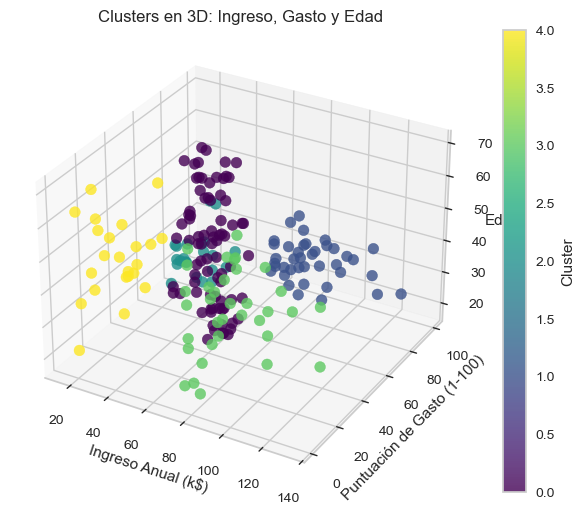

In [104]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    df_processed['Annual Income (k$)'],
    df_processed['Spending Score (1-100)'],
    df_processed['Age'],
    c=df_processed['Cluster'],
    s=60,
    alpha=0.8,
    cmap='viridis'
)
ax.set_xlabel('Ingreso Anual (k$)')
ax.set_ylabel('Puntuación de Gasto (1-100)')
ax.set_zlabel('Edad')
plt.title('Clusters en 3D: Ingreso, Gasto y Edad')
plt.colorbar(scatter, label='Cluster')
plt.show()

El análisis de clustering K-means ha identificado 5 segmentos distintos de personas, cada uno con características y comportamientos de compra únicos:

Cluster 0 - 81 personas (40.5%):
  - Edad media: 42.7 años (rango: 18.0-70.0)
  - Género: 33 hombres, 48 mujeres
  - Ingreso anual medio: $55.3k (rango: $39.0-$76.0k)
  - Puntuación media de gasto: 49.5/100 (rango: 34.0-61.0)

Cluster 1 - 39 personas (19.5%):
  - Edad media: 32.7 años (rango: 27.0-40.0)
  - Género: 18 hombres, 21 mujeres
  - Ingreso anual medio: $86.4k (rango: $69.0-$132.75k)
  - Puntuación media de gasto: 82.1/100 (rango: 63.0-97.0)

Cluster 2 - 22 personas (11.0%):
  - Edad media: 25.3 años (rango: 18.0-35.0)
  - Género: 9 hombres, 13 mujeres
  - Ingreso anual medio: $25.7k (rango: $15.0-$39.0k)
  - Puntuación media de gasto: 79.4/100 (rango: 61.0-99.0)

Cluster 3 - 35 personas (17.5%):
  - Edad media: 41.1 años (rango: 19.0-59.0)
  - Género: 19 hombres, 16 mujeres
  - Ingreso anual medio: $88.1k (rango: $70.0-$132.75k)
  - Puntuación media de gasto: 17.1/100 (rango: 1.0-39.0)

Cluster 4 - 23 personas (11.5%):
  - Edad media: 45.2 años (rango: 19.0-67.0)
  - Género: 9 hombres, 14 mujeres
  - Ingreso anual medio: $26.3k (rango: $15.0-$39.0k)
  - Puntuación media de gasto: 20.9/100 (rango: 3.0-40.0)

El Coeficiente de Silhouette:tuvo una puntuación de 0.5555, lo cual indica una buena cantidad de separación entre los gruposcon algunas superposiciones entre ellos.

El Índice de Calinski-Harabasz: tuvo una puntuación de 252.3506, lo cual indica que los cluster son definidos pero no se encontro  una estructura sustancial en los datos.

